In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TABLEAU_COLORS, same_color
import pickle
import sys
import glob 
import os
import re

def find_data(datadir,wdet):
    data = []    
    for (root, dirs, files) in os.walk(datadir):
        for file in files:
            if wdet in file:
                file_path = os.path.join(root, file)
                data.append(file_path)
    return data


# Gaps from NSCF to B3LYP-GauPBE

In [17]:
# extract Gap from r_setup
rdata = find_data("./TDDFT-LRC/B3LYP","r_setup")
gaps_b3lyp = []
for i,j in enumerate(sorted(rdata)):
    with open(j, "r") as file:
            for line in file:
                # Process each line
                if "[X] Indirect Gap                                  :" in line:
                    nline = line.split(":")[-1].split("[")[0]
                    gaps_b3lyp.append([i,float(nline)])
                    
gaps_b3lyp = np.array(gaps_b3lyp)                  
# ====================================== Gau-PBE
rdata2 = find_data("./TDDFT-LRC/Gau-PBE/calc-4","r_setup")
gaps_gaup = []
for i,j in enumerate(sorted(rdata2)):
    with open(j, "r") as file:
            for line in file:
                # Process each line
                if "[X] Indirect Gap                                  :" in line:
                    nline = line.split(":")[-1].split("[")[0]
                    gaps_gaup.append([i,float(nline)])
                    
gaps_gaup = np.array(gaps_gaup)   
strain  = gaps_b3lyp[:,0]
strain2 = gaps_gaup[:,0]

B3LYP = gaps_b3lyp[:,1]
GauPBE = gaps_gaup[:,1]
# difs
promedio = (B3LYP + GauPBE) / 2
semi_diferencia = np.abs(B3LYP - GauPBE) / 2

tot_gaps =  np.column_stack((gaps_gaup[:,0],gaps_b3lyp[:,1],gaps_gaup[:,1],promedio,semi_diferencia))
np.savetxt("hybrid-gaps-data/gaps_b3lyp_gaup_1.dat",tot_gaps)

tot_gaps

array([[0.0000000e+00, 1.2957160e+00, 1.3601140e+00, 1.3279150e+00,
        3.2199000e-02],
       [1.0000000e+00, 1.2504010e+00, 1.2834070e+00, 1.2669040e+00,
        1.6503000e-02],
       [2.0000000e+00, 1.1889630e+00, 1.1917950e+00, 1.1903790e+00,
        1.4160000e-03],
       [3.0000000e+00, 1.1197020e+00, 1.1047730e+00, 1.1122375e+00,
        7.4645000e-03],
       [4.0000000e+00, 1.0377990e+00, 1.0059680e+00, 1.0218835e+00,
        1.5915500e-02],
       [5.0000000e+00, 9.5064700e-01, 8.9895200e-01, 9.2479950e-01,
        2.5847500e-02]])

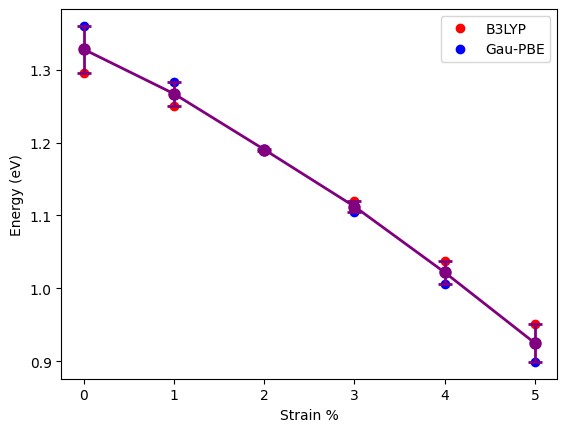

In [6]:
strain = gaps_b3lyp[:,0]
strain2 = gaps_gaup[:,0]

B3LYP = gaps_b3lyp[:,1]
GauPBE = gaps_gaup[:,1]
# Calcular diferentes tipos de errores
error_absoluto = np.abs(B3LYP - GauPBE)
error_relativo = (np.abs(B3LYP - GauPBE) / B3LYP) * 100
diferencia_raw = B3LYP - GauPBE  # Sin valor absoluto para ver bias
promedio = (B3LYP + GauPBE) / 2
semi_diferencia = np.abs(B3LYP - GauPBE) / 2

fig,ax=plt.subplots(1,1)
ax.plot(strain,B3LYP,'ro',label="B3LYP")    
ax.plot(strain2,GauPBE,'bo',label="Gau-PBE")    
ax.set_xlabel("Strain %")
ax.set_ylabel("Energy (eV)")


ax.errorbar(strain, promedio, yerr=semi_diferencia, 
             fmt='o-', color='purple', linewidth=2, markersize=8,
             capsize=5, capthick=2, elinewidth=2,)
ax.legend()
plt.show()